<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
Missing Values:
Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64


<ipython-input-4-19d326f90c0b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['y'], palette="viridis")


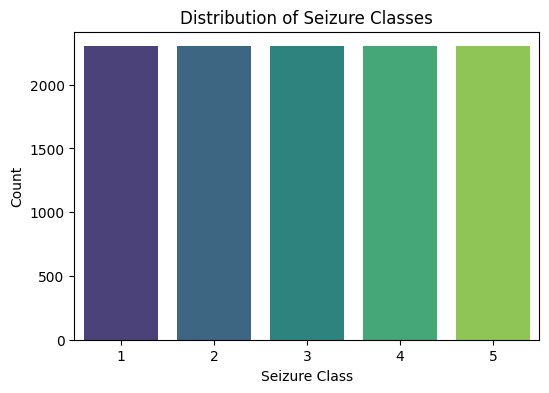

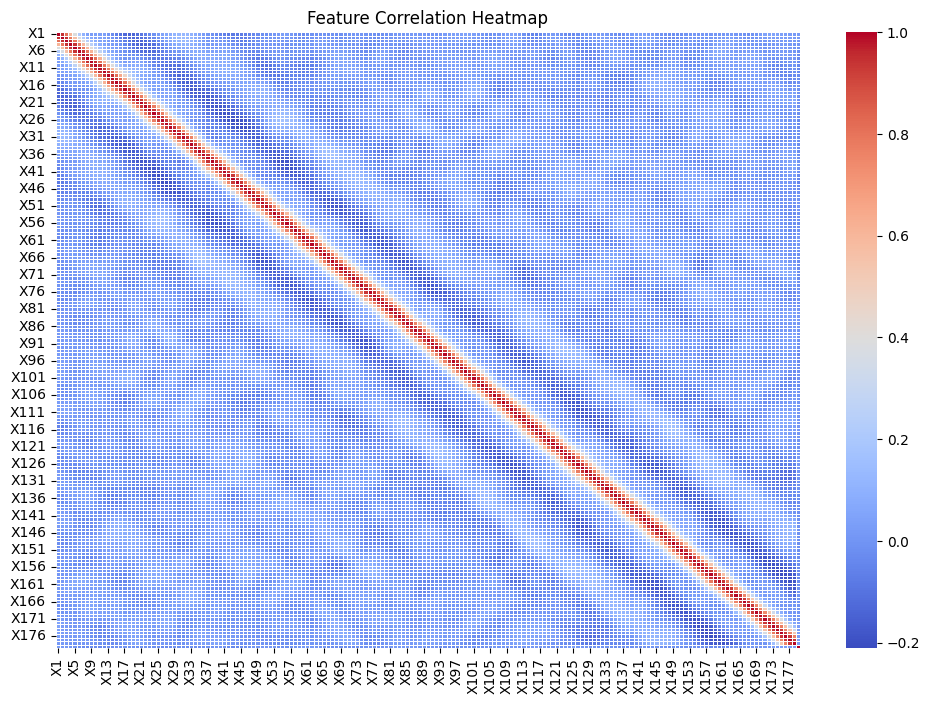

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.96      0.96       465
           2       0.63      0.55      0.59       459
           3       0.57      0.57      0.57       450
           4       0.75      0.75      0.75       457
           5       0.61      0.67      0.64       469

    accuracy                           0.70      2300
   macro avg       0.70      0.70      0.70      2300
weighted avg       0.70      0.70      0.70      2300



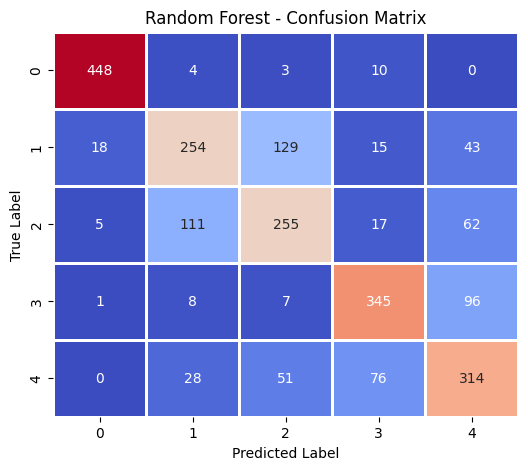

In [ ]:


import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

data=pd.read_csv("/content/sample_data/Epileptic Seizure Recognition.csv")

"""Information About The dataset"""

data.head()

data.shape

data.info()

data.describe()

data.isnull().sum()

data['y'].value_counts()

"""**Exploratory Data Analysis**"""

sns.countplot(data['y'])

# Remove the 'Unnamed' column from the DataFrame.
data = data.drop(columns=['Unnamed'])

# Calculate the correlation matrix on the modified DataFrame.
sns.heatmap(data.corr(), annot=True)

# Instead of trying to drop the column again,
# you can simply skip this step as it's already removed.
# Alternatively, you can add a check to see if the column exists before dropping:

if 'Unnamed' in data.columns:
    data.drop(['Unnamed'], axis=1, inplace=True)

d=pd.DataFrame(data.iloc[:,0:-1])

d.head()

"""Standardize the data"""

from sklearn.preprocessing  import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(d)

X=scaled_data
y=data['y']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y)

"""Using RandomForest Classifier"""

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

model=rf.fit(X_train,y_train)

pred=model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

In [ ]:
data=pd.read_csv("/content/Epileptic Seizure Recognition.csv")

Information About The dataset

In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
data.shape

(11500, 180)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
data.isnull().sum()

,0
Unnamed,0
X1,0
X2,0
X3,0
X4,0
...,...
X175,0
X176,0
X177,0
X178,0


In [ ]:
data['y'].value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


**Exploratory Data Analysis**

<Axes: ylabel='count'>

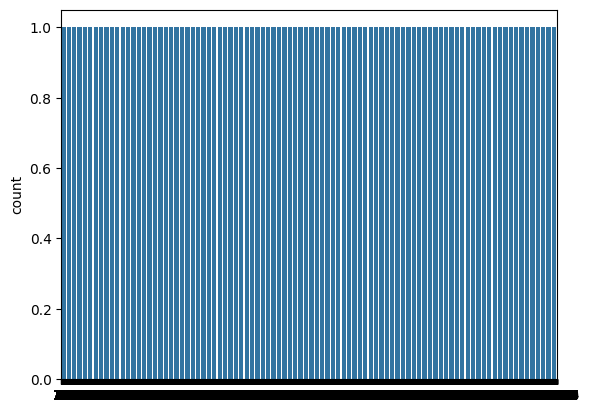

In [ ]:
sns.countplot(data['y'])

<Axes: >

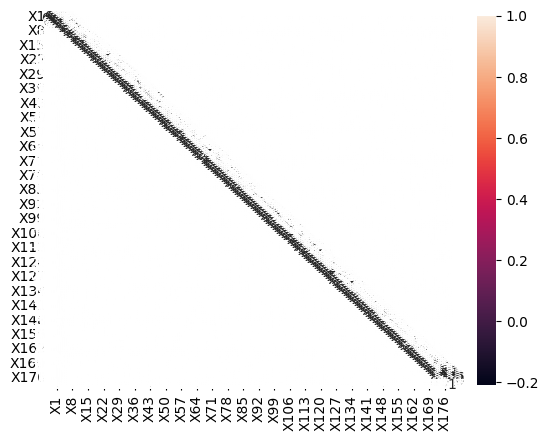

In [ ]:
# Remove the 'Unnamed' column from the DataFrame.
data = data.drop(columns=['Unnamed'])

# Calculate the correlation matrix on the modified DataFrame.
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Instead of trying to drop the column again,
# you can simply skip this step as it's already removed.
# Alternatively, you can add a check to see if the column exists before dropping:

if 'Unnamed' in data.columns:
    data.drop(['Unnamed'], axis=1, inplace=True)

In [ ]:
d=pd.DataFrame(data.iloc[:,0:-1])

In [ ]:
d.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


Standardize the data

In [ ]:
from sklearn.preprocessing  import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_data=scaler.fit_transform(d)

In [ ]:
X=scaled_data
y=data['y']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
model=rf.fit(X_train,y_train)

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[558  10   6  16   0]
 [ 31 277 142  16  57]
 [  8 141 308  22  65]
 [  2   8  17 454 133]
 [  0  43  87 103 371]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       590
           2       0.58      0.53      0.55       523
           3       0.55      0.57      0.56       544
           4       0.74      0.74      0.74       614
           5       0.59      0.61      0.60       604

    accuracy                           0.68      2875
   macro avg       0.68      0.68      0.68      2875
weighted avg       0.68      0.68      0.68      2875

